In [0]:
#Base de donnée foret
import pandas as pd
import matplotlib.pyplot as plt
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id': '13IDmojFEIUJys7nYBpO6gsDkgpYP7aov'})
downloaded.GetContentFile('13IDmojFEIUJys7nYBpO6gsDkgpYP7aov')
foret = pd.read_csv("13IDmojFEIUJys7nYBpO6gsDkgpYP7aov", skiprows=3) 
#https://drive.google.com/open?id=13IDmojFEIUJys7nYBpO6gsDkgpYP7aov

In [0]:
foret = foret.drop(["Country Code","Indicator Name","Indicator Code","Unnamed: 64"], axis=1)


In [0]:
foret.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.2,4.200000,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.0,13500.000000,NaN,NaN,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609760.000000,608511.992188,607263.984375,606016.015625,604768.007812,603520.000000,602271.992188,601023.984375,599776.015625,598528.007812,597280.000000,596031.992188,594783.984375,593536.015625,592288.007812,591040.000000,589791.992188,588543.984375,587296.015625,586048.007812,584800.000000,583551.992188,582303.984375,581056.015625,579808.007812,578560.0,577311.992188,NaN,NaN,NaN
3,Albanie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7887.999878,7868.499756,7849.000244,7829.500122,7810.000000,7790.499878,7770.999756,7751.500244,7732.000122,7712.500000,7692.999878,7719.199829,7745.399780,7771.599731,7797.800293,7824.000244,7811.799927,7799.600220,7787.399902,7775.200195,7762.999878,7753.400269,7743.800049,7734.199829,7724.600220,7715.0,7705.399780,NaN,NaN,NaN
4,Andorre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.0,160.000000,NaN,NaN,NaN


In [0]:
foret = foret.T
foret.columns = foret.iloc[0]
foret = foret.iloc[1:]

In [0]:
foret_monde = pd.DataFrame(foret['Monde'])

foret_monde.rename(columns={'Monde': "Surf"}, inplace = True)

foret_monde['Region'] = 'Monde'

foret_monde.head()

,Surf,Region
1960,NaN,Monde
1961,NaN,Monde
1962,NaN,Monde
1963,NaN,Monde
1964,NaN,Monde


In [0]:
foret_bresil = pd.DataFrame(foret['Brésil'])

foret_bresil.rename(columns={'Brésil': "Surf"}, inplace = True)

foret_bresil['Region'] = 'Brésil'

foret_bresil.head()

,Surf,Region
1960,NaN,Brésil
1961,NaN,Brésil
1962,NaN,Brésil
1963,NaN,Brésil
1964,NaN,Brésil


In [0]:
data_foret = pd.concat([foret_monde, foret_bresil])

data_foret = data_foret.dropna(axis=0)

data_foret['Surf'] = pd.to_numeric(data_foret['Surf'])

data_foret.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 1990 to 2016
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Surf    54 non-null     float64
 1   Region  54 non-null     object 
dtypes: float64(1), object(1)
memory usage: 1.3+ KB


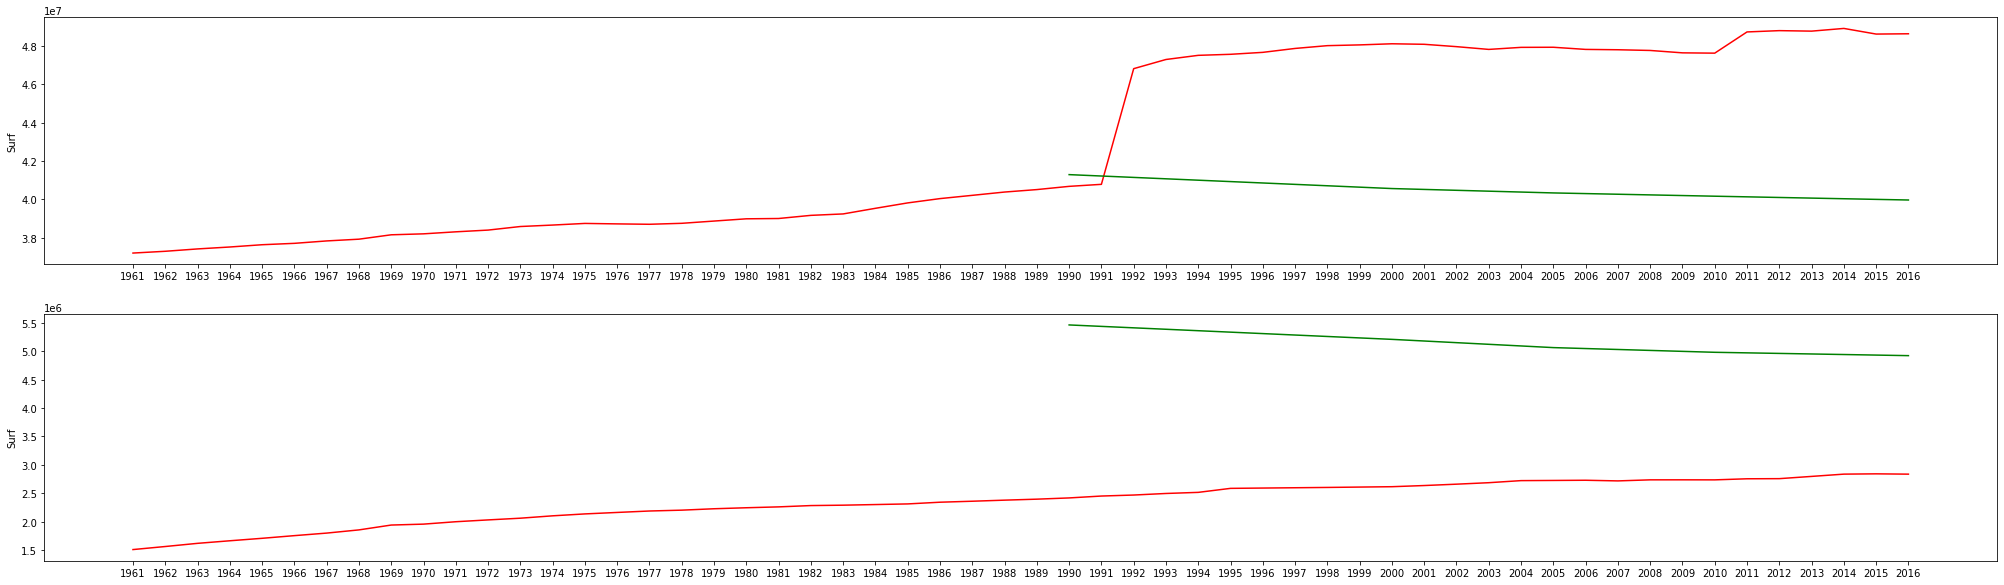

In [0]:
import seaborn as sns

fig, ax = plt.subplots(2, 1, figsize = (35, 10))

ax1 = plt.subplot(211)
ax1 = sns.lineplot(x = data_agri[data_agri['Region'] == 'Monde'].index, y = 'Surf', data = data_agri[data_agri['Region'] == 'Monde'], color='r')
ax1 = sns.lineplot(x = data_foret[data_foret['Region'] == 'Monde'].index, y = 'Surf', data = data_foret[data_foret['Region'] == 'Monde'], color = 'g')

ax2 = plt.subplot(212)
ax2 = sns.lineplot(x = data_agri[data_agri['Region'] == 'Brésil'].index, y = 'Surf', data = data_agri[data_agri['Region'] == 'Brésil'],color='r')
ax2 = sns.lineplot(x = data_foret[data_foret['Region'] == 'Brésil'].index, y = 'Surf', data = data_foret[data_foret['Region'] == 'Brésil'], color = 'g')
plt.show()

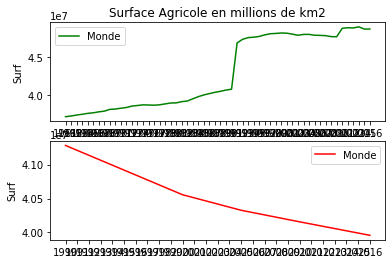

In [0]:
fig, ax = plt.subplots(2, 1)
ax1 = plt.subplot(211)
ax1 = sns.lineplot(x = data_agri[data_agri['Region'] == 'Monde'].index, y = 'Surf', data = data_agri[data_agri['Region'] == 'Monde'], color='green', label = "Monde")
plt.title("Surface Agricole en millions de km2")

ax2 = plt.subplot(212)
ax2 = sns.lineplot(x = data_foret[data_foret['Region'] == 'Monde'].index, y = 'Surf', data = data_foret[data_foret['Region'] == 'Monde'],color='r',label = "Monde")

In [0]:
data_foret['Year'] = pd.to_numeric(data_foret.index)
data_agri['Year'] = pd.to_numeric(data_agri.index)

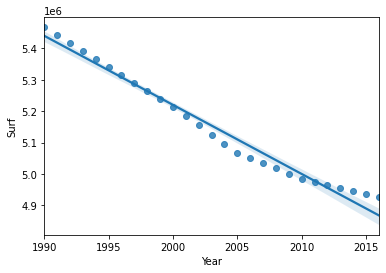

In [0]:
sns.regplot(x = 'Year', y = 'Surf', data = data_foret[data_foret['Region'] == 'Monde'])

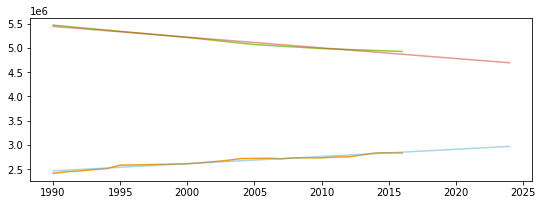

In [0]:
# Paramètres du modèle
import numpy as np

df = data_foret[data_foret['Region'] == 'Brésil']
df1 = data_agri[(data_agri['Region'] == 'Brésil') & (data_agri['Year'] > 1989)]

Xaxis = df['Year']
Yaxis = df['Surf']
Xmin = Xaxis.min()
Xmax = Xaxis.max()
array = np.arange(Xmin, 2025)

Xaxis1 = df1['Year']
Yaxis1 = df1['Surf']
Xmin1 = Xaxis1.min()
Xmax1 = Xaxis1.max()
array1 = np.arange(Xmin1, 2025)

fig, ax = plt.subplots(figsize = (9, 3))
_ = plt.plot('Year', 'Surf', data = df, c = '#9BC53D')
_ = plt.plot(array, np.poly1d(np.polyfit(x = Xaxis, y = Yaxis, deg = 1))(array), c = '#C0392B', alpha = .5)

_ = plt.plot('Year', 'Surf', data = df1, c = '#F39C12')
_ = plt.plot(array1, np.poly1d(np.polyfit(x = Xaxis1, y = Yaxis1, deg = 1))(array1), c = '#52AED8', alpha = .5)

plt.show()



In [0]:
#Base de donnée Agricole
import pandas as pd
import matplotlib.pyplot as plt
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id': '1DWYXI77EN8mNbHCZdaibNdRa9sicqjku'})
downloaded.GetContentFile('1DWYXI77EN8mNbHCZdaibNdRa9sicqjku')
agri = pd.read_csv("1DWYXI77EN8mNbHCZdaibNdRa9sicqjku", skiprows=3) 
#https://drive.google.com/open?id=1DWYXI77EN8mNbHCZdaibNdRa9sicqjku

In [0]:
agri = agri.drop(["Country Code","Indicator Name","Indicator Code","Unnamed: 64"], axis=1)

In [0]:
agri = agri.T
agri.columns = agri.iloc[0]
agri = agri.iloc[1:]

In [0]:
agri_monde = pd.DataFrame(agri['Monde'])

agri_monde.rename(columns={'Monde': "Surf"}, inplace = True)

agri_monde['Region'] = 'Monde'

agri_monde.head()

In [0]:
agri_bresil = pd.DataFrame(agri['Brésil'])

agri_bresil.rename(columns={'Brésil': "Surf"}, inplace = True)

agri_bresil['Region'] = 'Brésil'

agri_bresil.head()

In [0]:
data_agri = pd.concat([agri_monde, agri_bresil])

data_agri = data_agri.dropna(axis=0)

data_agri['Surf'] = pd.to_numeric(data_agri['Surf'])

data_agri.info()

In [0]:
data_agri.head(100)

,Surf,Region
1961,3.718967e+07,Monde
1962,3.728241e+07,Monde
1963,3.740541e+07,Monde
1964,3.750572e+07,Monde
1965,3.762444e+07,Monde
...,...,...
2000,2.614060e+06,Brésil
2001,2.634650e+06,Brésil
2002,2.658680e+06,Brésil
2003,2.684690e+06,Brésil
